<a href="https://colab.research.google.com/github/ksetdekov/ml_dpo_2021/blob/master/hw/hw2/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №2

Задание выполнил: ```(Кирилл Сетдеков)```

### Общая информация

__Дата выдачи:__ 25.04.2021

__Дедлайн:__ 05.05.2021 23:59

# О задании

В этом домашнем задании вы реализуете градиентный спуск и стохастический градиентный спуск для обучения линейной регрессии, попрактикуетесь в анализе данных и их обработке, а также примените модели линейной регрессии на практике и проанализируете результаты.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.


### Оценивание и штрафы


#### Gradient Descent [8 баллов]
* [Задание 1](#task1) [1 балл]
* [Задание 2](#task2) [2 балла]
* [Задание 3](#task3) [3 балла]
* [Задание 4](#task4) [2 балла]

#### Linear Regression [8 баллов] + 2 бонусных
* [Задание 1](#task21) [1 балл]
* [Задание 2](#task22) [1 балл]
* [Задание 3](#task23) [1 балл]
* [Задание 4](#task24) [1 балл]
* [Задание 5](#task25) [1 балл]
* [Задание 6](#task26) [1 балл]
* [Задание 7](#task27) [1 балл]
* [Задание 8](#task28) [1 балл]
* [Задание 9](#task29) [2 баллa]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{16},$$ где $s$ - сумма набранных балов. С учетом бонусов, за домашнее задание можно получить > 10 балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/811). 

## Часть 1. Gradient Descent

Среднеквадратичная ошибка на всем датасете $(X, y) = \{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ для линейной регрессии с вектором весов $w$ (в предположении, что в данных есть единичный признак) представляется следующим образом:

$$
Q(w) = \frac{1}{\ell}\|Xw - y\|_2^2
$$

Градиент данного функционала потерь по $w$:

$$
\nabla_w Q(w) = \frac{2}{\ell}X^T(Xw - y)
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Для тестирования реализованных вами методов будет использоваться датасет о ценах домов из `sklearn`.

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# загружаем данные
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# делим данные на обучающую и тестовую часть
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

### Задание 1 <a id="task1"></a>

С линейной регрессией удобно работать в матрично-векторном виде, если предположить, что в данных есть единичный признак. Реализуйте функцию, которая принимает на вход матрицу объекты-признаки, и добавляет в нее столбец (первый), заполненный единицами. Примените написанную функцию к обучающей и тестовой части имеющихся данных.

Например, если на вход подается матрица 
$$
\begin{pmatrix}
2 & 4 & 4200\\
0 & 10 & 5000\\
2 & 2 & 1000\\
\end{pmatrix},
$$
то на выходе будет матрица
$$
\begin{pmatrix}
1 & 2 & 4 & 4200\\
1 & 0 & 10 & 5000\\
1 & 2 & 2 & 1000\\
\end{pmatrix}$$

**Hint** 
- Вам могут пригодиться функции `np.concatenate`, `np.ones`

In [3]:
# create function
def add_identity_feature(X):
    '''
    INPUT:
    X - np.array shape=(ℓ, d-1)
    
    OUTPUT:
    X - np.array shape=(ℓ, d)
    '''
    leftmost = np.ones((X.shape[0], 1))
    X = np.append(leftmost, X, axis=1)
    return X

X_train = add_identity_feature(X_train)
X_test = add_identity_feature(X_test)


In [4]:
# test yourself
assert X_train.shape == (354, 14)
assert len(X_train) == X_train.sum(axis=0)[0]

assert X_test.shape == (152, 14)
assert len(X_test) == X_test.sum(axis=0)[0]

### Задание 2 <a id="task2"></a>

Реализуйте подсчет среднеквадратичной функции потерь и ее градиента по весам. Формулы должны быть реализованы в явном виде с помощью `numpy`, без использования циклов `for`.

**Hint** 
- Для умножения матрицы на вектор (или матрицы на матрицу) можно использовать функцию `np.dot`. 
- Не забывайте, что оператор `*` используется только для поэлементного умножения.
- Также может пригодиться функция `np.linalg.norm`

In [5]:
def mse_loss(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    loss - scalar
    """
    
    y_hat = X @ w
    loss = np.linalg.norm(y - y_hat)
    loss = (loss**2) / X.shape[0]

    return loss


def mse_grad(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    grad - np.array shape=(d,)
    """

    grad = (2/ X.shape[0]) *( X.T @ X @ w - X.T @ y)
    return grad

Посчитайте `result_mse_sklearn` используя функцию `mean_squared_error` из sklearn, чтобы сравнить c результатом вашей функции

In [6]:
from sklearn.metrics import mean_squared_error

w = np.zeros(X_train.shape[1])

result_mse_custom = mse_loss(X_train, y_train, w)
result_mse_grad = mse_grad(X_train, y_train, w)


result_mse_sklearn = mean_squared_error(y_train, np.dot(X_train,w))

assert (X_train @ w).shape == y_train.shape
assert np.allclose(result_mse_custom, result_mse_sklearn)
assert np.allclose(result_mse_grad, np.array([-43.9424,  -99.9887, -675.8766, -444.0919,   -3.0395,  
                                              -23.5569,   -282.6831,  -2829.3631,   -177.206 ,  -373.6983,
                                              -16820.8966,   -796.6377, -16136.5175,   -477.6308]),rtol=1e-03)

### Задание 3  <a id="task3"></a>

Реализуйте класс для линейной регрессии. Он должен поддерживать обучение с помощью градиентного спуска (метод `fit`) и предсказание для выборки (метод `predict`).

Метод `fit` должен возвращать список из значений функционала потерь на каждой итерации градиентного спуска. Напомним, что алгоритм градиентного спуска состоит из трех этапов:

1. **Инициализация.** В данном случае вектор весов вы можете инициализировать нулями.
2. **Шаг градиентного спуска.** Обновление весов с помощью антиградиента функционала потерь с заданной длиной шага (параметр `eta`). 
$$
w^{t+1} = w^t - \eta \nabla Q(w^t)
$$
Для того, чтобы нарисовать график зависимости значения функционала потерь от номера итерации, необходимо на каждом шаге запоминать значение функционала потерь (обновлять список `self.loss_history`). На этом этапе вы можете использовать уже реализованные вами функции `mse_loss` и `mse_grad` из предыдущего задания.

3. **Остановка.** В качестве критерия останова используйте $\|w^t - w^{t - 1}\| < \varepsilon$ (значение $\varepsilon$ задается параметром `tol`). В качестве дополнительного критерия останова используйте максимальное число итераций (параметр `max_iter`). Таким образом, даже если первый критерий не сработает, алгоритм все равно остановится после `max_iter` шагов.

In [7]:
class CustomLinearRegressionGD:
    def __init__(self):
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y, max_iter=100, tol=1e-6, eta=1e-6):
        """
        ARGUMENTS:
        max_iter - максимальное число шагов градиентного спуска
        tol - значение эпсилон для критерия останова
        eta - длина шага градиентного спуска (learning rate)
        X - np.array of shape (ℓ, d)
        y - np.array of shape (ℓ,)
        
        OUTPUT:
        loss_hist - list 
        """
        
        self.w = np.zeros(X.shape[1])
        self.loss_history = [mse_loss(X, y, self.w)]
        for t in range(max_iter):
            next_w = self.w - eta * mse_grad(X, y, self.w)
            if np.linalg.norm(next_w - self.w) < tol:
                break
          
            self.w = next_w 
            self.loss_history.append(mse_loss(X, y, self.w))

        
        return self.loss_history
        
    def predict(self, X):
        """
        ARGUMENTS:
        X_test - np.array of shape (ℓ, d)
        
        OUTPUT:
        y_pred - np.array of shape (ℓ,)
        """
        y_pred = X @ self.w
        return y_pred

Проверьте работу вашего класса. 
- Обучите линейную регрессию на обучающей части выборки.
- Постройте график зависимости значения функционала потерь от итерации градиентного спуска. 
- Подберите вручную оптимальную длину шага градиентного спуска и посчитайте MSE на тестовой части с помощью функции `mean_squared_error` из `sklearn`. 
- Добейтесь того, чтобы значение MSE не превышало 100.

In [8]:
lr = CustomLinearRegressionGD()
lr.fit(X_train, y_train, max_iter=900,eta=2e-6)

y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

88.4051822571095

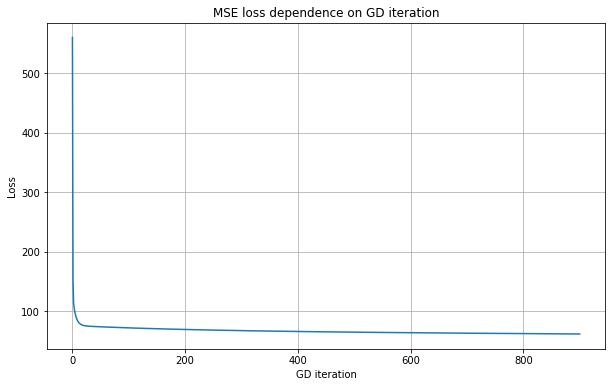

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(lr.loss_history)
plt.title('MSE loss dependence on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [10]:
mse_test = mse_loss( X_test, y_test, lr.w)
print(mse_test)
assert len(lr.loss_history) <= 1000
assert mse_test <= 100

88.40518225710953


### Задание 4 <a id="task4"></a>

Как известно, масштабирование данных может помочь в сходимости градиентного спуска (вспомните, почему). Отмасштабируйте имеющиеся данные с помощью мин-макс шкалирования:

$$
x^j = \frac{x^j - \min(x^j)}{\max(x^j) - \min(x^j)},
$$

где $x^j$ - это вектор значений признака.

Учтите, что единичный признак нормировать не надо (почему?). Так что либо придумайте способ, как отнормировать все столбцы, кроме единичного.

Примените линейную регрессию с градиентным спуском к данным, подберите оптимальную длину шага. Добейтесь того, чтобы значение MSE не превышало 100.

Опишите наблюдения. Изменилась ли ситуация?

In [11]:
class MinMaxCustom:
    def __init__(self):
        self.mins = None
        self.maxs = None
        
    def fit(self, X):
        """
        ARGUMENTS:
        X - np.array of shape (ℓ, d)

        OUTPUT:
        (mins, maxs) - tuple of mins and maxs for columns 
        """
        
        (ones,values) =np.hsplit(X, [1])
        self.mins = values.min(axis=0)
        self.maxs = values.max(axis=0)
        return (self.mins, self.maxs)
        
    def predict(self, X):
        """
        ARGUMENTS:
        X_raw - np.array of shape (ℓ, d)
        
        OUTPUT:
        X_transformed - np.array of shape (ℓ, d)
        """
        (ones,values) =np.hsplit(X, [1])
        values = (values - self.mins) / (self.maxs - self.mins)
        y_pred = np.hstack((ones,values))
        return y_pred

In [12]:
# scale the data
scaler = MinMaxCustom()
scaler.fit(X_train)

X_train_scaled = scaler.predict(X_train)
X_test_scaled = scaler.predict(X_test)


# train linear regression with gradient descent
lr_scaled = CustomLinearRegressionGD()
lr_scaled.fit(X_train_scaled, y_train, max_iter=900,eta=8e-2)

[560.428813559322,
 179.2945669490673,
 116.14601202643587,
 101.58952159549125,
 94.89085375210979,
 89.8431769344091,
 85.45852844650892,
 81.54245658314154,
 78.02530960284058,
 74.86072782456134,
 72.00982665240093,
 69.43837071616599,
 67.11595773459742,
 65.01554889432319,
 63.11308988131684,
 61.38717969397101,
 59.818776991693106,
 58.39093907596889,
 57.08858977896346,
 55.89831304296397,
 54.80816934450038,
 53.807532434203665,
 52.886944143715425,
 52.037985259914336,
 51.253160688079696,
 50.525797322458,
 49.849953217755065,
 49.22033681075533,
 48.63223507971821,
 48.0814496523234,
 47.56423998243238,
 47.07727281330717,
 46.6175772315252,
 46.18250469283895,
 45.76969346971685,
 45.37703703120815,
 45.00265591993869,
 44.64487273921407,
 44.30218990604407,
 43.97326986399813,
 43.65691748368077,
 43.352064408744944,
 43.0577551321554,
 42.77313461124288,
 42.497437251280516,
 42.229977106159254,
 41.9701391614986,
 41.71737158043343,
 41.47117880557182,
 41.2311154224070

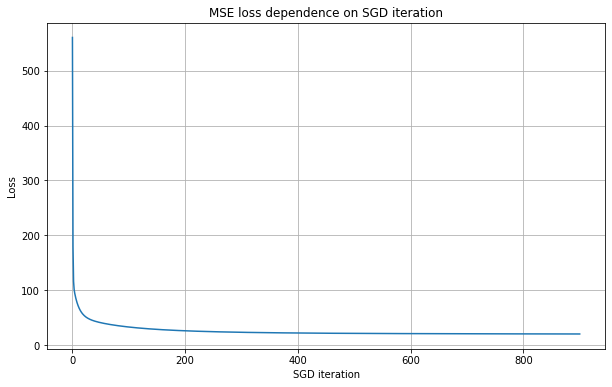

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(lr_scaled.loss_history)
plt.title('MSE loss dependence on SGD iteration')
plt.xlabel('SGD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

### Наблюдения
Сейчас трансформация применяется.
Можно отметить, что на масштабированных данных получилось использовать скорость
обучения $\eta$ на 3 порядка больше, чем при исходном подходе в задании 3, при 
этом все равно решение сходится.

Если применить $\eta =0,08$ для исходных данных, то алгоритм не находит решение для $w$

При этом получилось на тесте добиться меньшей ошибки $\Rightarrow$ одни плюсы.

In [14]:
mse_test = mse_loss(X_test_scaled, y_test, lr_scaled.w)
print(mse_test)
assert mse_test <= 100

29.58966403346496


# Часть 2 

In [15]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

import numpy as np
import pandas as pd
import requests

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

Данные можно скачать [тут](https://raw.githubusercontent.com/WeaselCMC/ml_dpo_2021/master/hw/hw2/train.csv)

In [16]:
req = requests.get('https://raw.githubusercontent.com/WeaselCMC/ml_dpo_2021/master/hw/hw2/train.csv')
url_content = req.content
csv_file = open('train.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

data = pd.read_csv('train.csv', header=0)
data.drop('Id', axis=1, inplace=True)
data.shape

(1460, 80)

In [17]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Задание 1 <a id="task21"></a>

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [18]:
misscount = data.isna().sum()
misscount[misscount>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [19]:
missratio = data.isna().mean()
missratio[missratio>0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

###  Наблюдения:
Из 80 штук, есть 19 признаков, где существуют пропуски.

### Задание 2 <a id="task22"></a>

Избавьтесь от пропусков. Заполните пропуски в колонках со значениями типа `object` (это можно проверить методом `.dtype` или `.dtypes`) отдельной категорией 'NaN', а в остальных (типа `float64` и `int64`) - средним по колонке.

Проверьте, что вы действительно избавились от пропусков.

In [20]:
cat_features_mask = (data.dtypes == "object").values


X_real = data[data.columns[~cat_features_mask]]
X_cat = data[data.columns[cat_features_mask]]

# для вещественнозначных признаков заполним пропуски средними значениями
mis_replacer = SimpleImputer(strategy="mean")

# для категориальных - пустыми строками
cat_replacer = SimpleImputer(strategy="constant", fill_value="NaN")


X_no_nans_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns) # your code here
X_no_nans_cat = pd.DataFrame(data=cat_replacer.fit_transform(X_cat), columns=X_cat.columns) # your code here

X_no_nans = pd.concat([X_no_nans_real, X_no_nans_cat], axis=1)

upd_misratio = X_no_nans.isna().mean()
upd_misratio[upd_misratio>0]

Series([], dtype: float64)

Мы получили пустую колонку в ```upd_misratio```, следовательно сейчас пропусков
нет



### Задание 3 <a id="task23"></a>

Для каждой колонки, выраженной числами (типа `float64` и `int64`), постройте гистограмму ее значений. Сильно ли отличается масштаб признаков? Отмасштабируйте признаки каким-нибудь методом (например, `StandardScaler` или `MinMaxScaler` из `sklearn`). 

**Не забудьте, что целевая переменная (столбец `'SalePrice'`) не входит в признаки!**

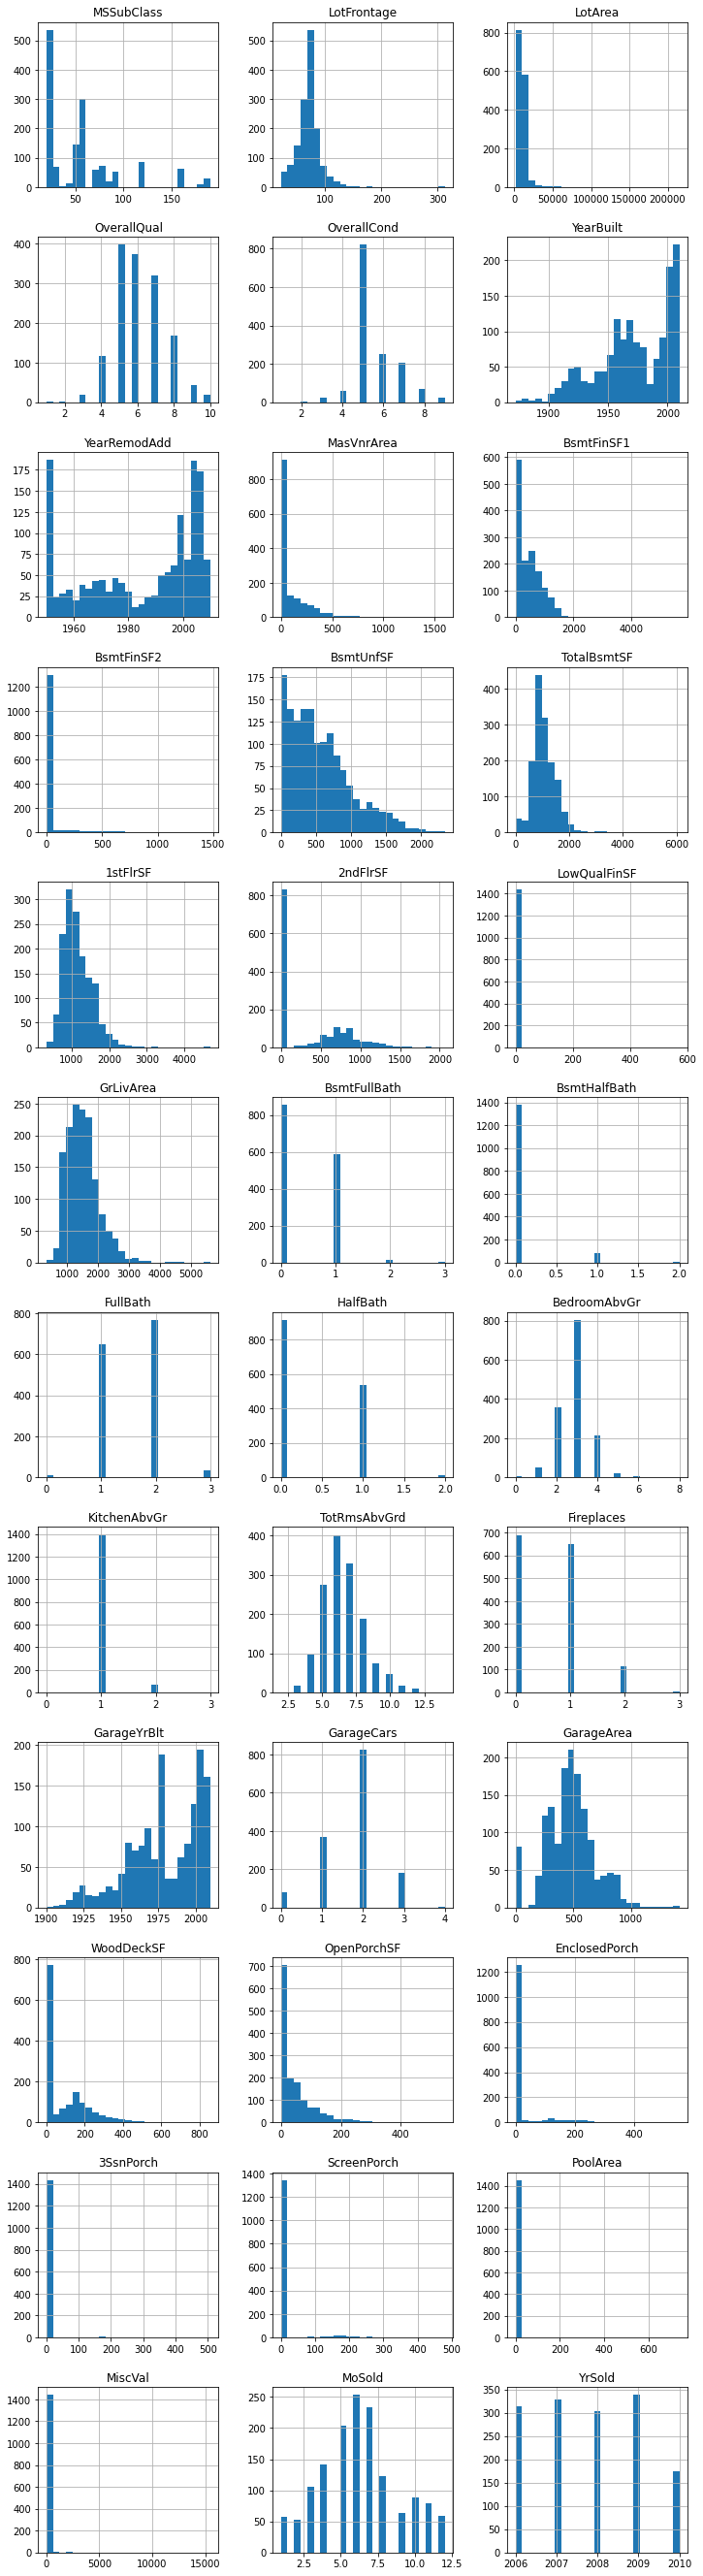

In [21]:
X_to_scale = X_no_nans_real.loc[:, X_no_nans_real.columns != 'SalePrice']
y = X_no_nans_real.SalePrice


fig, axes = plt.subplots(len(X_to_scale.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X_to_scale.hist(column = X_to_scale.columns[i], bins = 25, ax=axis)
        i = i+1

Разница масштаба переменных примерно 4 порядка

Есть штуки (число ванных комнат или очагов), есть сотни тысяч - площадь участка
в квадратных футах.

Сделаю стандартизацию.

In [22]:
scaler = StandardScaler()
scaler.fit(X_to_scale)
print(scaler.mean_)
X_normalized = scaler.transform(X_to_scale)
X_normalized = pd.DataFrame(X_normalized, columns = X_to_scale.columns)

[5.68972603e+01 7.00499584e+01 1.05168281e+04 6.09931507e+00
 5.57534247e+00 1.97126781e+03 1.98486575e+03 1.03685262e+02
 4.43639726e+02 4.65493151e+01 5.67240411e+02 1.05742945e+03
 1.16262671e+03 3.46992466e+02 5.84452055e+00 1.51546370e+03
 4.25342466e-01 5.75342466e-02 1.56506849e+00 3.82876712e-01
 2.86643836e+00 1.04657534e+00 6.51780822e+00 6.13013699e-01
 1.97850616e+03 1.76712329e+00 4.72980137e+02 9.42445205e+01
 4.66602740e+01 2.19541096e+01 3.40958904e+00 1.50609589e+01
 2.75890411e+00 4.34890411e+01 6.32191781e+00 2.00781575e+03]


In [23]:
X_normalized

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.104483,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.937776,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.812705,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.896086,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.854395,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,-0.021102,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,1.569647,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.563645,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,-0.832788,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.188432,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


### Задание 4 <a id="task24"></a>

Обработайте категориальные признаки. Примените к ним one-hot кодирование. Сколько получилось колонок у итогового датасета?

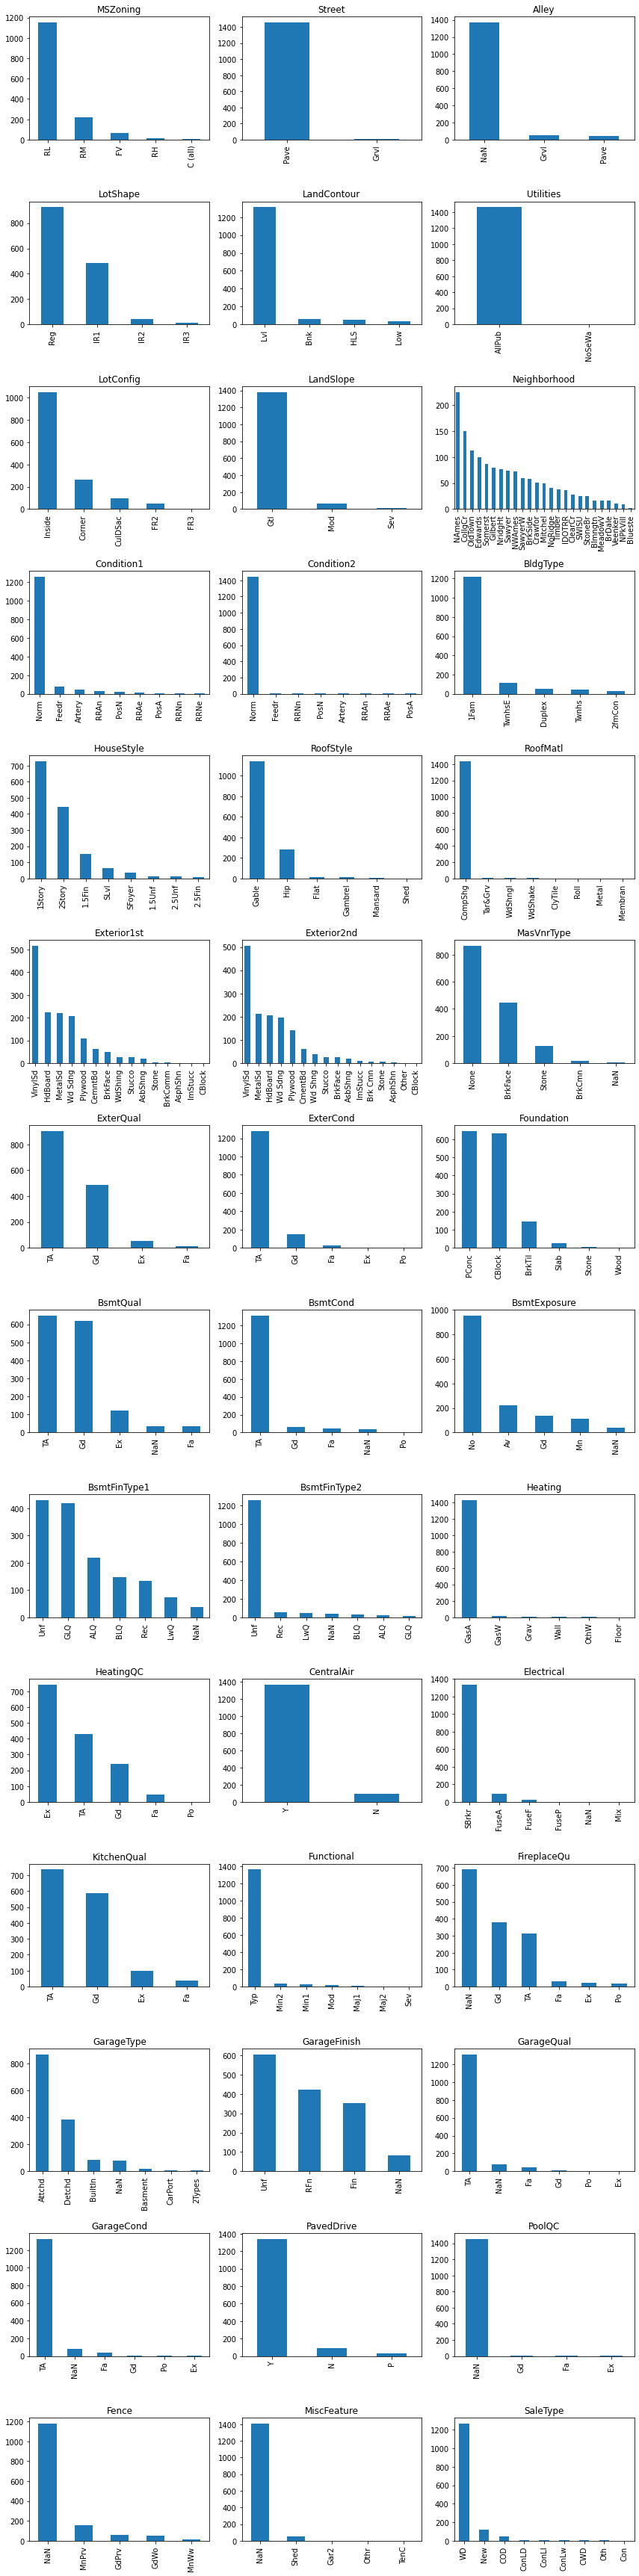

In [24]:
fig, axes = plt.subplots(len(X_no_nans_cat.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        # X_no_nans_cat.hist(column = X_no_nans_cat.columns[i], ax=axis)
        X_no_nans_cat[X_no_nans_cat.columns[i]].value_counts().plot(kind='bar', title=X_no_nans_cat.columns[i], ax=axis)
        i = i+1

plt.tight_layout()

In [25]:
X_dum = pd.get_dummies(X_no_nans_cat, drop_first=True)
print(X_dum.shape)

(1460, 225)


In [26]:
print(f"Мы получили суммарно {X_dum.shape[1]} дамми переменных из {X_no_nans_cat.shape[1]} исходных категориальных.")

Мы получили суммарно 225 дамми переменных из 43 исходных категориальных.


соберем обратно данные всех признаков в 1 таблицу

In [27]:
X_transformed = pd.concat([X_normalized, X_dum], axis=1)
X_transformed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageType_NaN,GarageFinish_NaN,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NaN,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NaN,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NaN,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NaN,MiscFeature_NaN,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.104483,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.937776,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.812705,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.896086,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Задание 5

- Постройте гистограмму распределения предсказываемого значения. 
- Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `np.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. 
- Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

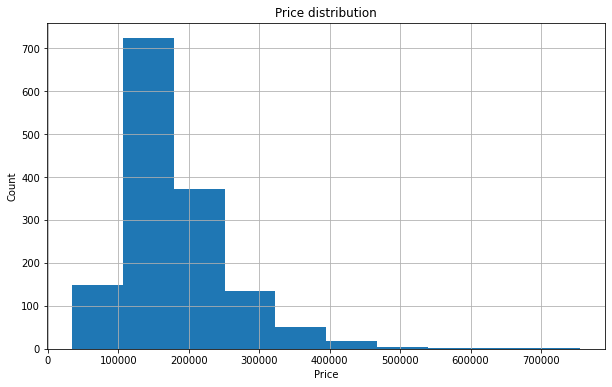

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(y)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid()
plt.show()

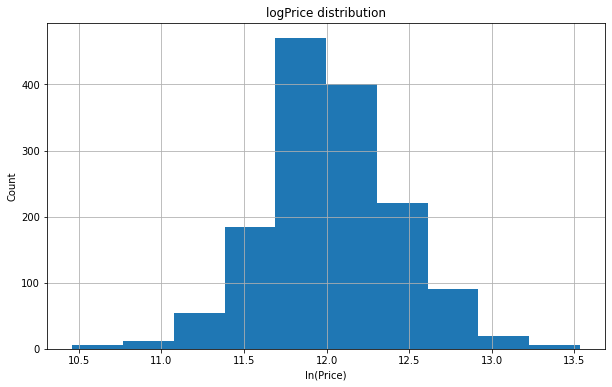

In [29]:
y_log = np.log1p(y)
plt.figure(figsize=(10, 6))
plt.hist(y_log)
plt.title('logPrice distribution')
plt.xlabel('ln(Price)')
plt.ylabel('Count')
plt.grid()
plt.show()

После транформиации мы получили более симметричное распределение значений целевого признака, вероятно это поможет нам снизить влияние самых дорогих объектов на коэффициенты.

---
Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, np.log1p(data['SalePrice']), random_state=13)

In [31]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 261), (365, 261), (1095,), (365,))

### Задание 6 <a id="task26"></a>

Перейдем к построению моделей машинного обучения с помощью `sklearn`. Обучите модель линейной регрессии на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error (корень из MSE) на обучающей и валидационной выборках. Что вы наблюдаете? Как вы можете объяснить такой результат?

In [32]:
simple_linear = LinearRegression(n_jobs=-1)
simple_linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [33]:
y_hat_train = simple_linear.predict(X_train)
print(mean_squared_error(y_train, y_hat_train, squared=False))


y_hat_test = simple_linear.predict(X_val)
print(mean_squared_error(y_val, y_hat_test, squared=False))

0.08377843154469293
1567840255.3344545


### выводы
глядя на RMSE - выглядит, что на обучающей выборке ($RMSE = 0.08$)модель работает нормально, но на тестовой ($RMSE = 1567840255.3$)- очень плохо. На иллюстрациях ниже видно, что есть ограниченное число наблюдений, для которых модель работает очень плохо, на остальных - соотношение истиненного и оцененного значения хуже, чем для обучающего, но не так радикально отличается.

In [34]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

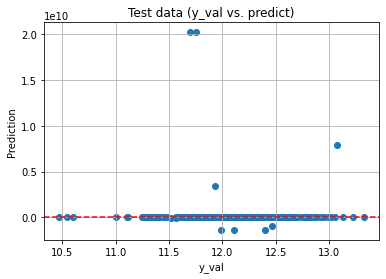

In [35]:
fig, ax = plt.subplots()
plt.scatter(y_val, y_hat_test)
add_identity(ax, color='r', ls='--')

plt.title('Test data (y_val vs. predict)')
plt.xlabel('y_val')
plt.ylabel('Prediction')

plt.grid()
plt.show()

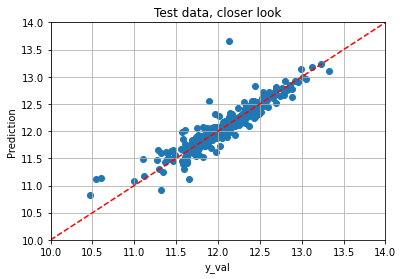

In [36]:
fig, ax = plt.subplots()
plt.scatter(y_val, y_hat_test)
add_identity(ax, color='r', ls='--')

ax.set_ylim(10, 14)
ax.set_xlim(10, 14)

plt.title('Test data, closer look')
plt.xlabel('y_val')
plt.ylabel('Prediction')

plt.grid()
plt.show()

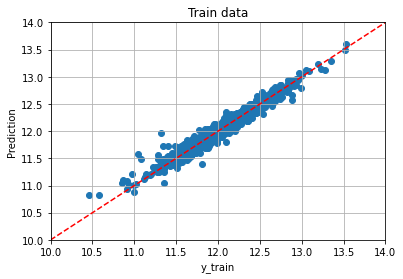

In [37]:
fig, ax = plt.subplots()
plt.scatter(y_train, y_hat_train)
add_identity(ax, color='r', ls='--')

ax.set_ylim(10, 14)
ax.set_xlim(10, 14)

plt.title('Train data')
plt.xlabel('y_train')
plt.ylabel('Prediction')

plt.grid()
plt.show()

In [38]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_hat_train))
print(r2_score(y_val, y_hat_test))

0.9554202126046635
-1.488925718502528e+19


Если мы смотрим $R^2$, также получаем что для тестовой выборки модель работает плохо, вероятно переобучение + плохая генерализация. Возможные причины - много скорреклированных факторов и большое число переменных относительно числа наблюдений.

### Задание 7 <a id="task27"></a>

Теперь примените методы линейной регрессии с регуляризацией - Lasso (L1) и Ridge (L2). 

Для подбора коэффициента регуляризации будем использовать росс-валидацию (вспомните, что такое кросс-валидация и зачем она нужна). 

`GridSearchCV` - это метод, который перебирает значения гиперпараметров (по заданной «сетке»), считает для каждого качество на кросс-валидации и позволяет выбрать лучший гиперпараметр. Более подробно вы можете познакомиться с методом в [документаци](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

1. Прочитайте документацию `sklearn.model_selection.GridSearchCV`
2. Подбирите оптимальный гиперпараметр для LASSO:
    - В качестве сетки используйте `np.logspace(-5, 1)`
    - Используйте 5-Fold Cross-Validation
3. Используя оптимельное значение гиперпаметра обучите модель на всей обучающей выборке, посчитайте ошибку на тренировочной и обучающей выборках
4. Повторите п. 2-3 для модели Ridge

In [39]:
from sklearn.model_selection import GridSearchCV

# пример "сетки"
np.logspace(-5, 1)

array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468e-04, 6.86648845e-04,
       9.10298178e-04, 1.20679264e-03, 1.59985872e-03, 2.12095089e-03,
       2.81176870e-03, 3.72759372e-03, 4.94171336e-03, 6.55128557e-03,
       8.68511374e-03, 1.15139540e-02, 1.52641797e-02, 2.02358965e-02,
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01])

In [40]:
# your Lasso code here

lasso_grid_searcher = GridSearchCV(
    Lasso(max_iter=9000,  random_state=13),
    param_grid={
        'alpha': np.logspace(-5, 1)
    },
    cv=5,
    scoring='neg_root_mean_squared_error'
)

lasso_grid_searcher.fit(X_train,y_train);


In [41]:
lasso_grid_searcher.best_params_

{'alpha': 0.0003906939937054617}

In [42]:
lasso_grid_searcher.best_score_


-0.11240880461721839

In [43]:
lasso_ful = Lasso(alpha =lasso_grid_searcher.best_params_['alpha'], max_iter=9000,  random_state=13)
lasso_ful.fit(X_train,y_train)
y_hat_lasso_train = lasso_ful.predict(X_train)
print(mean_squared_error(y_train, y_hat_lasso_train, squared=False))


y_hat_lasso_test = lasso_ful.predict(X_val)
print(mean_squared_error(y_val, y_hat_lasso_test, squared=False))

0.09519876566125009
0.21884624826326227


In [44]:
# your Ridge code here
ridge_grid_searcher = GridSearchCV(
    Ridge(max_iter=9000,  random_state=13),
    param_grid={
        'alpha': np.logspace(-5, 1)
    },
    cv=5,
    scoring='neg_root_mean_squared_error'
)

ridge_grid_searcher.fit(X_train,y_train);
ridge_grid_searcher.best_params_

{'alpha': 10.0}

In [45]:
ridge_grid_searcher.best_score_


-0.11219797411096588

In [46]:
ridge_ful = Ridge(alpha=ridge_grid_searcher.best_params_['alpha'], max_iter=9000,  random_state=13)
ridge_ful.fit(X_train,y_train)
y_hat_ridge_train = ridge_ful.predict(X_train)
print(mean_squared_error(y_train, y_hat_ridge_train, squared=False))


y_hat_ridge_test = ridge_ful.predict(X_val)
print(mean_squared_error(y_val, y_hat_ridge_test, squared=False))

0.09273154531506851
0.21739446989965602


### Задание 8 <a id="task28"></a>

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

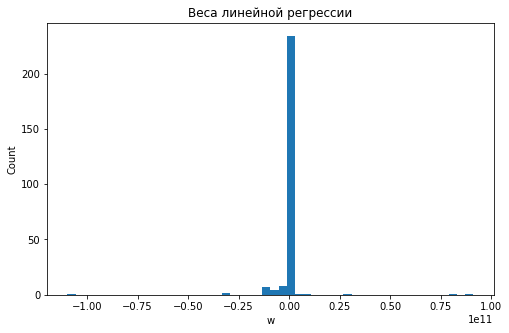

In [47]:
plt.figure(figsize=(8, 5))
plt.hist(simple_linear.coef_,bins=50)

plt.title('Веса линейной регрессии')
plt.xlabel('w')
plt.ylabel('Count')
plt.show()

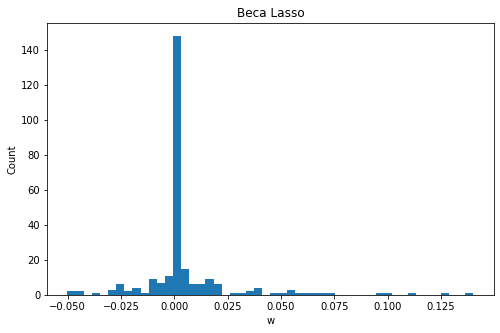

In [48]:
plt.figure(figsize=(8, 5))
plt.hist(lasso_ful.coef_,bins=50)

plt.title('Веса Lasso')
plt.xlabel('w')
plt.ylabel('Count')
plt.show()

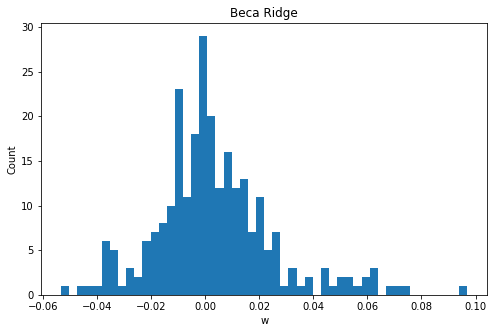

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(ridge_ful.coef_,bins=50)

plt.title('Веса Ridge')
plt.xlabel('w')
plt.ylabel('Count')
plt.show()

In [50]:
comp_coef = pd.DataFrame(zip(X_train.columns,lasso_ful.coef_, ridge_ful.coef_,simple_linear.coef_), columns=['feature','lasso_coef', 'ridge_coef', 'linreg_coef'])

comp_coef.sort_values(by=['linreg_coef'])

,feature,lasso_coef,ridge_coef,linreg_coef
15,GrLivArea,1.401414e-01,0.074379,-1.096819e+11
8,BsmtFinSF1,2.012670e-02,0.026920,-3.116802e+10
10,BsmtUnfSF,-0.000000e+00,0.006879,-3.019552e+10
234,GarageCond_TA,1.013733e-03,-0.003092,-1.234621e+10
230,GarageCond_Fa,-0.000000e+00,-0.010536,-1.234621e+10
...,...,...,...,...
222,GarageFinish_NaN,-8.703922e-19,-0.004636,4.166056e+09
14,LowQualFinSF,-9.042658e-03,-0.002665,1.014895e+10
11,TotalBsmtSF,4.522438e-02,0.038219,2.997946e+10
12,1stFlrSF,6.214382e-03,0.049204,8.069127e+10


In [51]:
len(lasso_ful.coef_[lasso_ful.coef_ == 0])

137

In [52]:
len(ridge_ful.coef_[ridge_ful.coef_ == 0])

8

### Основные выводы:


1.   При построении обычной линейной регрессии получаются веса, чьи коэффициенты отличаются на 11 порядков по размеру.
2.   По гистограммам, и сравнивая значения весов, видно что L1 регуляризация работает - 137 коэффициентов в Lasso регрессии равны 0.

3.   Эти же коэффициенты имеют низкие веса для Ridge регрессии.
4.   Для Ridge нет такого строгово эффекта отбора переменных, строго нулевых коэффициентов только 8.
4.   Для Lasso и Ridge - абсолютные значения весов стали все находится в интервале $\pm 0.13$



### Задание 9 (Бонус) <a id="task29"></a>


- Скачайте тестовые данные из соревнования [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=test.csv)
- Примените к ним те же шаги предобработки (заполнение пропусков, масштабирование, и т.д.)
- Выберите лучшую модель, которую вам удалось обучить и предскажите с ее помощью цену 
- На забудьте, что ваша модель предсказывает логарифм (см. Задание 5), так что нужно применить обраное преобразование
- Загрузите ваши прогнозы на Kaggle (`Submit Prediction`) и узнайте их точность. 

#### Получилось набрать Score = 0.13192 и войти в 33%.
Лучшая регрессия - Ridge
[https://www.kaggle.com/ksetdekov/competitions](https://www.kaggle.com/ksetdekov/competitions)

реализация ниже, я скопировал исходные данные к себе в ветку на github.

##### подготовка данных

In [53]:
req = requests.get('https://raw.githubusercontent.com/ksetdekov/ml_dpo_2021/master/hw/hw2/kaggle_data/train.csv')
url_content = req.content
csv_file = open('k_train.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

data_tr = pd.read_csv('k_train.csv', header=0)
data_tr.drop('Id', axis=1, inplace=True)
data_tr.shape

(1460, 80)

In [54]:
# missings 
missratio = data_tr.isna().mean()
print(missratio[missratio>0])

cat_features_mask = (data_tr.dtypes == "object").values


X_real = data_tr[data_tr.columns[~cat_features_mask]]
X_cat = data_tr[data_tr.columns[cat_features_mask]]

# для вещественнозначных признаков заполним пропуски средними значениями
mis_replacer = SimpleImputer(strategy="mean")

# для категориальных - пустыми строками
cat_replacer = SimpleImputer(strategy="constant", fill_value="NaN")


X_no_nans_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns) # your code here
X_no_nans_cat = pd.DataFrame(data=cat_replacer.fit_transform(X_cat), columns=X_cat.columns) # your code here

X_no_nans = pd.concat([X_no_nans_real, X_no_nans_cat], axis=1)

upd_misratio = X_no_nans.isna().mean()
upd_misratio[upd_misratio>0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64


Series([], dtype: float64)

In [55]:
# scaled
X_to_scale = X_no_nans_real.loc[:, X_no_nans_real.columns != 'SalePrice']


scaler = StandardScaler()
scaler.fit(X_to_scale)
print(scaler.mean_)
X_normalized = scaler.transform(X_to_scale)
X_normalized = pd.DataFrame(X_normalized, columns = X_to_scale.columns)

# one-hot
drop_enc = OneHotEncoder(handle_unknown='ignore').fit(X_no_nans_cat)
enc_output = drop_enc.transform(X_no_nans_cat).toarray()
X_dum = pd.DataFrame(enc_output, columns = drop_enc.get_feature_names(X_no_nans_cat.columns))


X_transformed = pd.concat([X_normalized, X_dum], axis=1)

[5.68972603e+01 7.00499584e+01 1.05168281e+04 6.09931507e+00
 5.57534247e+00 1.97126781e+03 1.98486575e+03 1.03685262e+02
 4.43639726e+02 4.65493151e+01 5.67240411e+02 1.05742945e+03
 1.16262671e+03 3.46992466e+02 5.84452055e+00 1.51546370e+03
 4.25342466e-01 5.75342466e-02 1.56506849e+00 3.82876712e-01
 2.86643836e+00 1.04657534e+00 6.51780822e+00 6.13013699e-01
 1.97850616e+03 1.76712329e+00 4.72980137e+02 9.42445205e+01
 4.66602740e+01 2.19541096e+01 3.40958904e+00 1.50609589e+01
 2.75890411e+00 4.34890411e+01 6.32191781e+00 2.00781575e+03]


In [56]:
X_transformed.shape

(1460, 304)

##### подготовка теста

In [57]:
req = requests.get('https://raw.githubusercontent.com/ksetdekov/ml_dpo_2021/master/hw/hw2/kaggle_data/test.csv')
url_content = req.content
csv_file = open('k_test.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

data_tst = pd.read_csv('k_test.csv', header=0)
id_output = data_tst.Id
data_tst.drop('Id', axis=1, inplace=True)
data_tst.shape

(1459, 79)

In [58]:
# missings 
missratio = data_tst.isna().mean()
print(missratio[missratio>0])

cat_features_mask = (data_tst.dtypes == "object").values

X_real = data_tst[data_tst.columns[~cat_features_mask]]
X_cat = data_tst[data_tst.columns[cat_features_mask]]


X_no_nans_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns) # your code here
X_no_nans_cat = pd.DataFrame(data=cat_replacer.fit_transform(X_cat), columns=X_cat.columns) # your code here

X_no_nans = pd.concat([X_no_nans_real, X_no_nans_cat], axis=1)

upd_misratio = X_no_nans.isna().mean()
upd_misratio[upd_misratio>0]


MSZoning        0.002742
LotFrontage     0.155586
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64


Series([], dtype: float64)

In [59]:
# scaled
X_to_scale = X_no_nans_real

X_normalized = scaler.transform(X_to_scale)
X_normalized = pd.DataFrame(X_normalized, columns = X_to_scale.columns)

# one-hot
enc_output = drop_enc.transform(X_no_nans_cat).toarray()
X_dum = pd.DataFrame(enc_output, columns = drop_enc.get_feature_names(X_no_nans_cat.columns))


X_test_transformed = pd.concat([X_normalized, X_dum], axis=1)

In [60]:
y_log = np.log1p(data_tr.SalePrice)
X_train, X_val, y_train = (X_transformed, X_test_transformed,y_log )


##### лассо

In [61]:
lasso_grid_searcher = GridSearchCV(
    Lasso(max_iter=9000,  random_state=13),
    param_grid={
        'alpha': np.logspace(-5, 3, num=200)
    },
    cv=5,
    scoring='neg_root_mean_squared_error'
)

lasso_grid_searcher.fit(X_train,y_train)
lasso_grid_searcher.best_params_

{'alpha': 0.0005872786613189483}

In [62]:
lasso_ful = Lasso(alpha =lasso_grid_searcher.best_params_['alpha'], max_iter=9000,  random_state=13)
lasso_ful.fit(X_train,y_train)
y_hat_lasso_train = lasso_ful.predict(X_train)
print(mean_squared_error(y_train, y_hat_lasso_train, squared=False))


y_hat_lasso_test = np.expm1(lasso_ful.predict(X_val))


0.10977047662533856


In [63]:
output_lasso = pd.DataFrame()
output_lasso['Id'] = id_output
output_lasso['SalePrice'] = y_hat_lasso_test
output_lasso

,Id,SalePrice
0,1461,116986.413263
1,1462,146462.782329
2,1463,172448.173411
3,1464,199414.202245
4,1465,196182.353523
...,...,...
1454,2915,86557.341427
1455,2916,86163.299205
1456,2917,165465.648500
1457,2918,116308.743564


In [64]:
output_lasso.to_csv("lasso.csv",index=False)

##### Ridge

In [65]:
# your Ridge code here
ridge_grid_searcher = GridSearchCV(
    Ridge(max_iter=9000,  random_state=13),
    param_grid={
        'alpha': np.logspace(-5, 3, num=200)
    },
    cv=5,
    scoring='neg_root_mean_squared_error'
)

ridge_grid_searcher.fit(X_train,y_train);
ridge_grid_searcher.best_params_

{'alpha': 17.027691722259014}

In [66]:
ridge_ful = Ridge(alpha=ridge_grid_searcher.best_params_['alpha'], max_iter=9000,  random_state=13, solver="saga")
ridge_ful.fit(X_train,y_train)
y_hat_ridge_train = ridge_ful.predict(X_train)
print(mean_squared_error(y_train, y_hat_ridge_train, squared=False))


y_hat_ridge_test = np.expm1(ridge_ful.predict(X_val))


0.11457127143870902


In [67]:
output_ridge = pd.DataFrame()
output_ridge['Id'] = id_output
output_ridge['SalePrice'] = y_hat_ridge_test
output_ridge.to_csv("ridge.csv",index=False)